# Lab 1 - Linear Regression
- **Author:** satej soman ([satej@berkeley.edu](mailto:satej@berkeley.edu))
- **Date:** Jan 22, 2025
- **Course:** INFO 251: Applied Machine Learning

### Learning Objectives:

* Become familiar with statistical packages
* Implement the OLS normal equations from scratch

### Feedback:

After the lab, please provide feedback via [this anonymous form](https://forms.gle/wNDEodLsHDJN8DPJ9). 


# 0. setting up your environment

In whichever computing environment you prefer (Anaconda, Google Colab, etc.) install the packages below and ensure you are able to import them without issues. 

Ask the TAs for assistance or come to office hours if you have issues with this step or any of the steps in Lab 0 (the prerequisite lab).

In [1]:
# useful imports!

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# hints to the notebook renderer about how matplotlib plots should be displayed
%matplotlib inline
%config InlineBackend.figure_format='retina'

# 1. Simulating randomness

### 1.1. random number generators

In machine learning, it's useful to use some math to model processes that are probabilistic, or stochastic, or non-deterministic. Computers, on the other hand, generally do not do well with non-determinism, so we simulate sequences of random events with _pseudo-random number generators_ (PRNGs) - functions that to an outside observer, return sequences of numbers that appear as if they are random. PRNGs can be used to simulate sequences of numbers that appear to follow specific statistical distributions. The [`numpy.random`](https://numpy.org/doc/stable/reference/random/index.html) and [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) packages implement several PRNGs that allow us to simulate sampling from different distributions. 

Below are some examples of using `numpy.random` to:

- generate one single random number uniformly distributed over the range $[0, 1)$
- generate an array of 5 numbers according to a unit normal distribution
- generate an array of 20 integers uniformly over the range $[0, 100)$ 


In [2]:
# produces a single random number uniformly distributed over the range $[0, 1)$
print(np.random.random())

# generates 5 random numbers distributed according to a zero-mean, unit-variance normal distribution
print(np.random.standard_normal(5))

# generates 20 random integers in the range 0 to 100
print(np.random.randint(low=0, high=100, size=20))

0.9643036428824547
[ 0.62715348 -0.7585159   0.89781129  0.29445823  0.81037766]
[37 49 19 27 82 24 28 92 91  5  3 83 12 41 45 49 14 68 62 68]


### 1.2. setting PRNG seeds

The exact same code presented above is replicated below. Run this cell. Is the output the same?

In [3]:
# produces a single random number uniformly distributed over the range $[0, 1)$
print(np.random.random())

# generates 5 random numbers distributed according to a zero-mean, unit-variance normal distribution
print(np.random.standard_normal(5))

# generates 20 random integers in the range 0 to 100
print(np.random.randint(low=0, high=100, size=20))

0.8305406475240816
[ 0.99826153 -1.07437722 -0.70256113 -0.69842423 -1.17331447]
[18 60 89 25 63 31  6 84 75 17 84 68  6 54 50 86 46 26 76 47]


Unless you were very, very, very lucky, you will see different numbers this time around. This is what you want to see from a pseudo-random number generator! Compare the outputs of both code cells with those of one or two labmates around you.

However, to make your results reproducible by others, you should always set the _seed_, or internal state of the PRNG function. Once a seed is set, the random numbers generated will follow the same pattern. With `numpy` this is done by calling the `np.random.seed` function and passing in a number. 

Below, set the random seed to `251`, and copy the lines of code from the first code cell below that. After that code, set the seed to `251` again, and copy the code to generate random numbers one more time. Run the code cell. What do you see? Compare the outputs of this code cell with those of one or two labmates around you.

In [4]:
# set the seed to 251
np.random.seed(251)

# run the three calls to random number generators
# produces a single random number uniformly distributed over the range $[0, 1)$
print(np.random.random())

# generates 5 random numbers distributed according to a zero-mean, unit-variance normal distribution
print(np.random.standard_normal(5))

# generates 20 random integers in the range 0 to 100
print(np.random.randint(low=0, high=100, size=20))


# set the seed to 251 again
np.random.seed(251)

# run the three calls to random number generators again
# produces a single random number uniformly distributed over the range $[0, 1)$
print(np.random.random())

# generates 5 random numbers distributed according to a zero-mean, unit-variance normal distribution
print(np.random.standard_normal(5))

# generates 20 random integers in the range 0 to 100
print(np.random.randint(low=0, high=100, size=20))

0.6376112291529786
[-0.29006888 -0.49199284 -0.22413338 -0.63855329  0.08630364]
[84 93 20 36 48 18 61 39 47 67 52 67 80 11 59  3 17 66  5 52]
0.6376112291529786
[-0.29006888 -0.49199284 -0.22413338 -0.63855329  0.08630364]
[84 93 20 36 48 18 61 39 47 67 52 67 80 11 59  3 17 66  5 52]


# 2. Estimating parameters of a distribution

Just before lecture yesterday, Josh spent a couple hours flipping a coin 10,000 times. He saved his results in `coin_flips.txt`, where the $n$-th row is `1` if he flipped a heads on attempt $n$, and `0` if he flipped a tails. We'd like to know if the coin is fair.



- What probability distribution describes the outcome of a single coin flip? What distribution does the entire dataset follow?
- What is a simple quantity to calculate in order to check if the coin he flipped is fair? What statistical test would you use to quantify your uncertainty about your answer?

- Read in the data (see: [`numpy.loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). For $N = 100, 200, 300, ..., 10,000$, implement your simple check on the first $N$ rows of data. Plot the results of the check as a function of $N$.

- Is the coin fair?

(100.0, 10000.0)

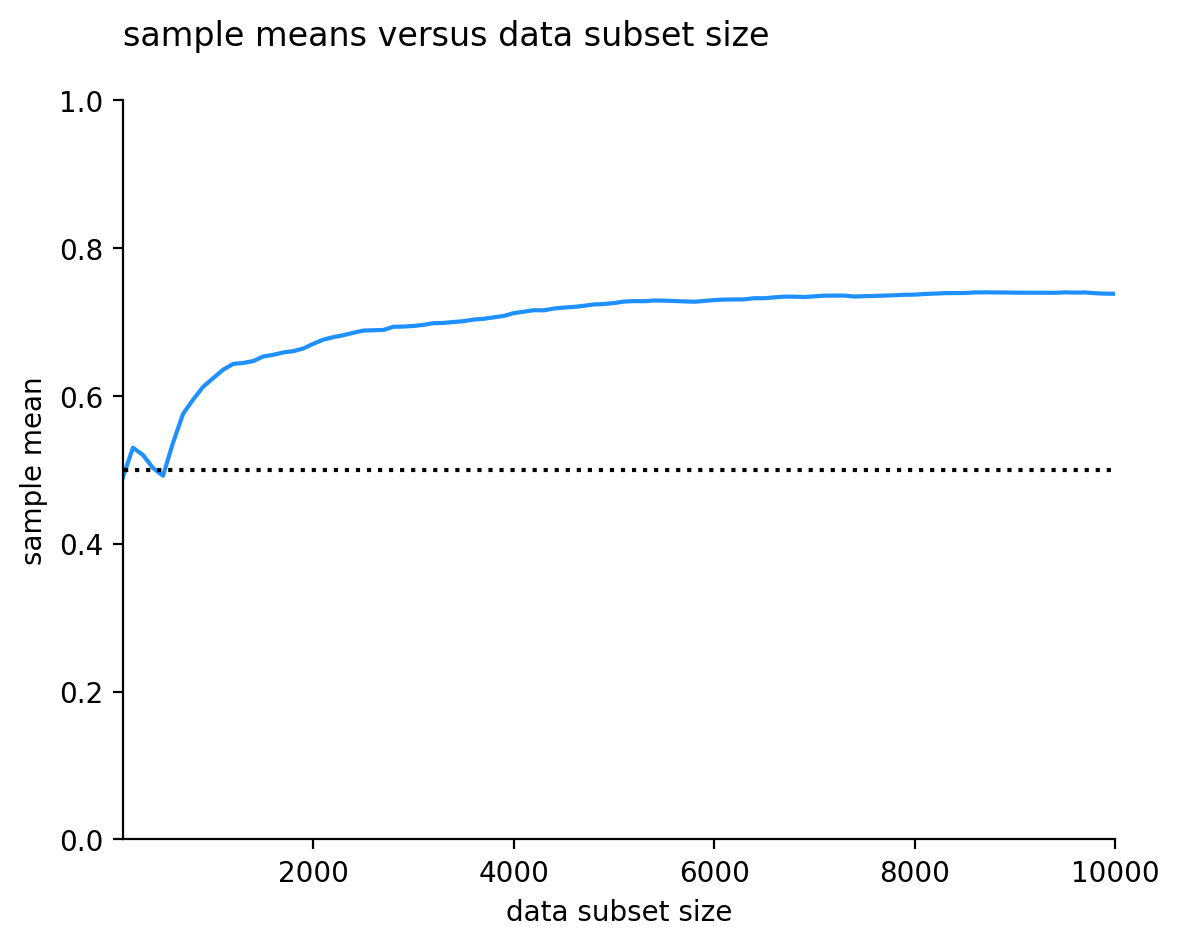

In [5]:
# A single coin flip follows a Bernoulli distribution, all the trials follow a binomial distribution.

# Check if the sample mean of the data is 0.5. A binomial test with the null hypothesis that the sample average is equal to 0.5 will quantify uncertainty.

# simple check
flips = np.loadtxt("coin_flips.txt")
subset_sizes = np.arange(100, len(flips)+1, 100)
means = [flips[:N].mean() for N in subset_sizes]

ax = plt.plot(subset_sizes, means, color = "dodgerblue")
plt.hlines(y=0.5, xmin=0, xmax=subset_sizes[-1], linestyles="dotted", color="black")
plt.title("sample means versus data subset size\n", loc = "left")
plt.xlabel("data subset size")
plt.ylabel("sample mean")
plt.gca().spines[['right', 'top']].set_visible(False)
plt.ylim(0, 1)
plt.xlim(subset_sizes[0], subset_sizes[-1])

# the coin is not fair, but neither is life

# 3. OLS normal equations

### 3.1. Let's work through Exercise 2.2 of the Stats Refresher (optional)

Recall the formulae for the OLS estimators for regressing a scalar $y$ on a scalar $x$ (bars over quantities denote sample averages):


$$\widehat{\beta}_1 = \frac{\sum_i (x_i - \overline{x})(y_i - \overline{y})}{\sum_i (x_i - \overline{x})^2} \ \ \ \ \ \ \ \ \ \ \widehat{\beta}_0 = \overline{y} - \widehat{\beta}_1 \overline{x}$$

Show that the expressions above for $\widehat{\beta}_0$ and $\widehat{\beta}_1$ are the result of minimizing the mean square error loss $L$ (defined below) over $n$ data points $\left\{x_i, y_i\right\}$ with respect to the parameters $\beta_0$ and $\beta_1$.

$$ L = \frac{1}{n}\sum_i \left( y_i - \beta_0 - \beta_1 x_i\right)^2 $$


<span style="color:orange">suggestion:</span> if this takes you more than 10 minutes, move on to the rest of the lab and come back to it on your own time, or in office hours.

### derivation:

First, take the derivative of $L$ with respect to $\beta_0$, and set it to zero:

$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum_i \left[ (-2)\left( y_i - \beta_0 - \beta_1 x_i\right) \right] = 0 $$

Multiply through by $-2$ and break up the summations over $y_i$ and $x_i$ (which simplify to sample averages). The summation over $\beta_0$ gives us $n\beta_0$, but the factor of $n$ is cancelled by the $1/n$ term we distribute: 
$$ \frac{1}{n}\sum_i y_i - \beta_0 -\beta_1 \cdot \frac{1}{n}\sum_i x_i = \overline{y} - \beta_0 - \beta_1\cdot \overline{x} = 0$$

Add $\beta_0$ to both sides:
$$\beta_0 = \overline{y} - \beta_1\cdot \overline{x}$$

Next, substitute our expression for $\beta_0$ into the expression for MSE:
$$ L = \frac{1}{n}\sum_i \left( y_i - (\overline{y} - \beta_1 \overline{x}) - \beta_1 x_i\right)^2 = \frac{1}{n}\sum_i \left( (y_i - \overline{y}) - \beta_1 (x_i - \overline{x})\right)^2  $$

Take the derivative of $L$ with respect to $\beta_1$, and set it equal to zero:
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum_i \left[ (-2) (x_i - \overline{x}) \left((y_i - \overline{y}) - \beta_1 (x_i - \overline{x})\right) \right] = 0 $$

Multiply through by $-2/n$, distribute $(x_i - \overline{x})$, and break up the summations over $(y_i - \overline{y})$ and $(x_i - \overline{x})$ as before: 
$$ \sum_i \left[ (x_i - \overline{x})(y_i - \overline{y}) \right] - \beta_1 \sum_i \left[(x_i - \overline{x})(x_i - \overline{x})\right] = 0 $$

Solve for $\beta_1$:
$$ \beta_1 = \frac{\sum_i (x_i - \overline{x})(y_i - \overline{y})}{\sum_i (x_i - \overline{x})^2} $$

### 3.2. implementing OLS with `numpy`

#### 3.2.1. synthetic data
First, generate some data where we know the "true" values of the OLS coefficients.
- Set the `numpy.random` seed to 0, so you can compare your work with that of your labmates.
- Create a vector $\mathbf{x} = [x_1, x_2, \cdots, x_{1000}]$ of 1000 random numbers uniformly distributed between 0 and 100.
- Create a vector $\mathbf{e}$ of 1000 random numbers drawn from a normal distribution with a mean of zero and a _**variance**_ of 25.
- Create a vector $\mathbf{y}$ where $y_i = x_i/5 + 7 + e_i$

In [ ]:
np.random.seed(0)

# "true" values
b0, b1 = 7, 1/5

# dataset characteristics
N = 1000
x_min, x_max = 0, 100

# generate data
x = np.random.uniform(x_min, x_max, N)
# note that the second parameter is std dev in the normal distribution implementation in numpy
e = np.random.normal(0, 5, N) 
y = b0 + b1*x + e

#### 3.2.2. scalar equations 

Using the scalar formulae above and the synthetic data you generated, calculate $\widehat{\beta}_0$ and $\widehat{\beta}_1$ for regressing $\mathbf{y}$ on $\mathbf{x}$ and an intercept. What should you expect the answers to be? How do they compare?

Create a scatter plot of the data, and plot the line of best fit $\widehat{y} = \widehat{\beta}_0 + \widehat{\beta}_1 \cdot x$ on the same plot.

the estimated OLS coefficients are beta_1 = 0.195148 and beta_0 = 7.385836.
the 'true' OLS coefficients are beta_1 = 0.2 and beta_0 = 7.


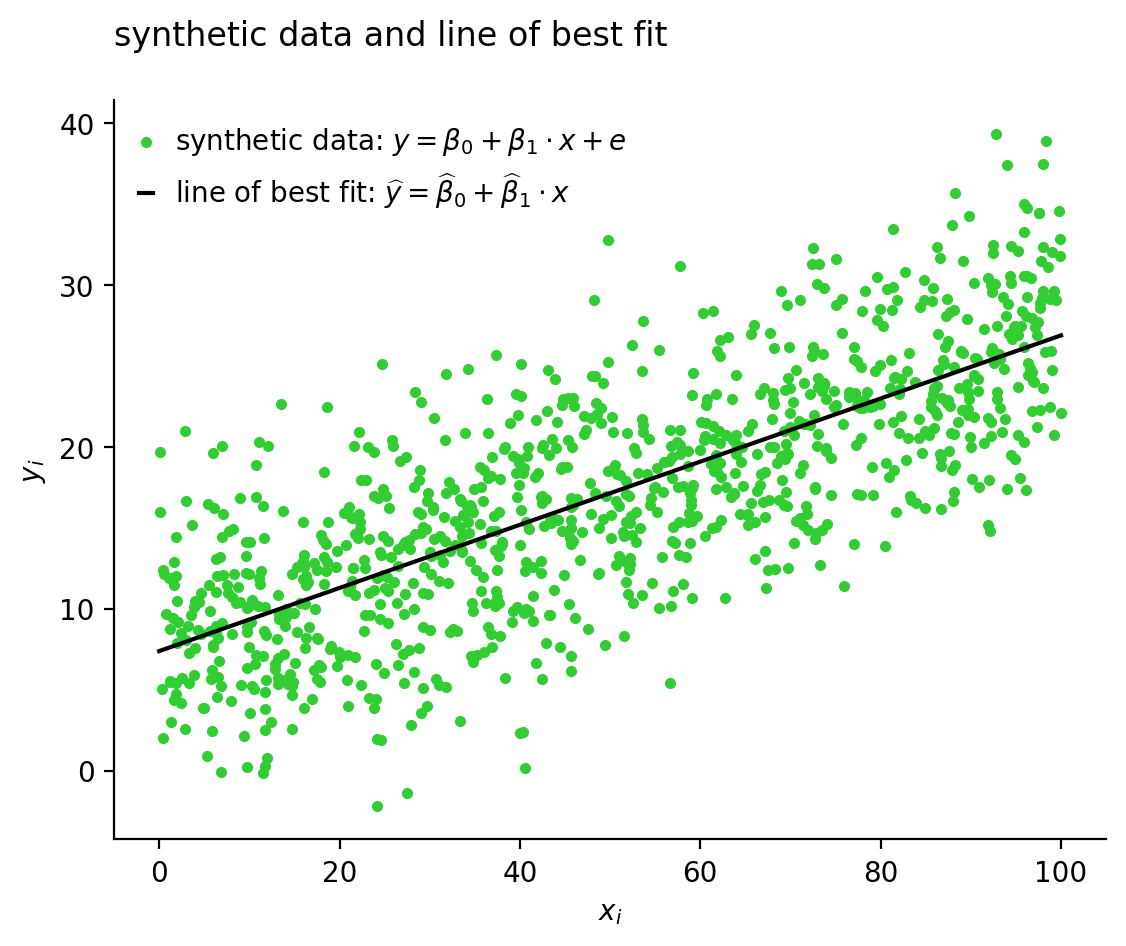

In [7]:
# calculate sample averages
x_bar = x.mean()
y_bar = y.mean()

# numpy arrays multiply element wise by default
cov_xy = sum((x - x_bar) * (y - y_bar))/N
var_x  = sum((x - x_bar) ** 2)/N

b1_hat = cov_xy / var_x
b0_hat = y_bar - b1_hat * x_bar

print(f"the estimated OLS coefficients are beta_1 = {b1_hat:4f} and beta_0 = {b0_hat:4f}.")
print(f"the 'true' OLS coefficients are beta_1 = {b1} and beta_0 = {b0}.")

# plot data and line of best fit
x_plot = np.linspace(0, 100)
y_plot = b0_hat + b1_hat * x_plot
ax = plt.scatter(x, y, color = "limegreen", marker = ".", label = "synthetic data: $y = \\beta_0 + \\beta_1\\cdot x + e$")
plt.plot(x_plot, y_plot, color = "black", label = "line of best fit: $\\widehat{y} = \\widehat{\\beta}_0 + \\widehat{\\beta}_1\\cdot x$")
plt.title("synthetic data and line of best fit\n", loc = "left")
plt.xlabel("$x_i$")
plt.ylabel("$y_i$")
plt.gca().spines[['right', 'top']].set_visible(False)
plt.legend(handlelength = 0.5, framealpha = 0)


### 3.2.3. matrix equations

Recall that the estimate of the parameter vector $\beta$ is also given by $\widehat{\beta} = (X^\prime X)^{-1}(X^\prime \mathbf{y})$, where $X$ is the _design matrix_, and $X^\prime$ denotes matrix transposition. 

- If we want to implement regression of $\mathbf{y}$ on $\mathbf{x}$ and an intercept this way, what should our design matrix be?
- Create the design matrix with `numpy`. 
- Implement the matrix-algebra expression for OLS given above using `numpy` operations and compare your results to the scalar version and the "true" values. Hints:
    - A multidimensional `numpy` array `X` can be transposed with the syntax `X.T`.
    - For `numpy` arrays `a` and `b`, `a * b` will multiply each element of `a` with the corresponding element in `b`. Use `a @ b` for dot products and matrix-vector products.
    - Use `np.linalg.inv` to invert matrices.

In [8]:
# the design matrix should have one column with the values of x and one column that is all ones

# create the matrix with the right shape, and implement the normal equations
X = np.vstack((x, np.ones_like(x))).T
B = np.linalg.inv(X.T @ X) @ (X.T @ y)
print(f"the coefficients are: {B[0]:4f} and {B[1]:4f}, agreeing with the scalar implementation")

the coefficients are: 0.195148 and 7.385836, agreeing with the scalar implementation


# 4. OLS with `pandas` and `statsmodels` (optional - preview of next week's lab)

### 4.1. `statsmodels` on our synthetic data

We are rarely going to implement OLS from scratch like we just did. There are many off-the-shelf options for performing OLS in scientific/numeric/statistical computing packages (cf. [`np.linalg.lstsq`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html), [`scipy.stats.linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html))

For this exercise and the next lab, we will be using the OLS implementation found in `statsmodels`, imported at the top of this notebook as `sm`. 

To see how `statsmodels` compares to our implementations, use `sm.OLS` to run a regression on our synthetic dataset by running the code cell below. Are the coefficients the same?
What information does the summary give you that our implementations did not? Is there information that hints at what we did differently with `sm`?


In [9]:
# specify a regression of y on x
model = sm.OLS(y, x) 
# fit the model
results = model.fit() 
# print coefficients
print(f"coefficients estimated by statsmodels: {results.params}")
print()
print("summary:")
results.summary()
# the coefficients are not the same!

coefficients estimated by statsmodels: [0.30601228]

summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              8295.
Date:                Fri, 17 Jan 2025   Prob (F-statistic):                        0.00
Time:                        12:20:28   Log-Likelihood:                         -3227.9
No. Observations:                1000   AIC:                                      6458.
Df Residuals:                     999   BIC:                                      6463.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3060      0.003     91.077      0.000       0.299       0.313
==============================================================================
Omnibus:                        3.946   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.821
Skew:                           0.114   Prob(JB):                        0.148
Kurtosis:                       2.801   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients are not the same! We don't even have the same number of parameters! 

This is because we didn't specify a constant term (or intercept) in our regression. The warning about R² says the same thing, and in the table of results, there isn't a row for the intercept. We can fix this by calling `sm.add_constant` on our regressors, which creates the design matrix properly. Run the code below and take note of the differences.

In [10]:
# specify model with a constant
model = sm.OLS(y, sm.add_constant(x))
# fit the model
results = model.fit() 
# print coefficients
print(f"params estimated by statsmodels: {results.params}")
print()
print("Summary:")
results.summary()

params estimated by statsmodels: [7.38583625 0.19514812]

Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     1376.
Date:                Fri, 17 Jan 2025   Prob (F-statistic):          4.76e-190
Time:                        12:20:28   Log-Likelihood:                -2993.5
No. Observations:                1000   AIC:                             5991.
Df Residuals:                     998   BIC:                             6001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3858      0.302     24.429      0.000       6.793       7.979
x1             0.1951      0.005     37.101      0.000       0.185       0.205
==============================================================================
Omnibus:                        1.562   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                1.588
Skew:                           0.096   Prob(JB):                        0.452
Kurtosis:                       2.962   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.2. mind the gap - `statsmodels` on real data

Let's run a regression on real data from the [Gapminder dataset](https://www.gapminder.org/data/), which collates development statistics for countries around the world. The file `gapminder.csv` contains a subset of the development metrics in the dataset. 

- Use `pandas` to read the dataset into a variable called `data`.
- Print the name of each of the columns in the dataset.
- Use the `DataFrame`'s `.dropna()` function to drop any missing values.
- Filter the data to only include entries from the year 2007.

In [11]:
# read the data
data = pd.read_csv("gapminder.csv")

# list the columns
print("columns in gapminder.csv:")
for column in data.columns:
    print("  - " + column)

# drop missing values and filter
data = data\
    .dropna()\
    .query("year == 2007")

columns in gapminder.csv:
  - country
  - year
  - population
  - continent
  - life_exp
  - gdp_cap


Regress life expectancy (`life_exp`) on per-capita GDP (`gdp_cap`) and a constant. Assuming you read the data into a variable called `data`, you can extract the data for a column with a given `column_name` by calling `data[column_name]`. 

How well does this regression explain variation in life expectancy?

In [12]:
model = sm.OLS(data["life_exp"], sm.add_constant(data["gdp_cap"]))
model.fit().summary()

# Per-capita GDP explains ~ 46% of the variation in life expectancy.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_exp   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     119.5
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           1.69e-20
Time:                        12:20:28   Log-Likelihood:                -510.88
No. Observations:                 142   AIC:                             1026.
Df Residuals:                     140   BIC:                             1032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.5657      1.010     58.952      0.000      57.568      61.563
gdp_cap        0.0006   5.83e-05     10.933      0.000       0.001       0.001
==============================================================================
Omnibus:                       12.169   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.722
Skew:                          -0.593   Prob(JB):                      0.00470
Kurtosis:                       2.363   Cond. No.                     2.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

If you're coming from a statistical programming language like R, you can also specify your regressions using formulae, which automatically include constants:

In [13]:
import statsmodels.formula.api as smf

smf.ols(formula="life_exp ~ gdp_cap", data = data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_exp   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     119.5
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           1.69e-20
Time:                        12:20:28   Log-Likelihood:                -510.88
No. Observations:                 142   AIC:                             1026.
Df Residuals:                     140   BIC:                             1032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.5657      1.010     58.952      0.000      57.568      61.563
gdp_cap        0.0006   5.83e-05     10.933      0.000       0.001       0.001
==============================================================================
Omnibus:                       12.169   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.722
Skew:                          -0.593   Prob(JB):                      0.00470
Kurtosis:                       2.363   Cond. No.                     2.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5. (optional) OLS consistency

Set your `numpy` random seed back to 0. Do the following 1000 times:

- Regenerate your synthetic data.
- Calculate $\widehat{\beta}_1$ for that version of the synthetic data, and store it.

Do not set the seed back to 0 after each iteration of the loop. This will ensure you have slightly different data on each iteration, but drawn from the same distribution.

Plot a histogram of the estimated values of $\widehat{\beta}_1$. What shape does the histogram take? What is the central value? What is the approximate spread of the distribution of values?

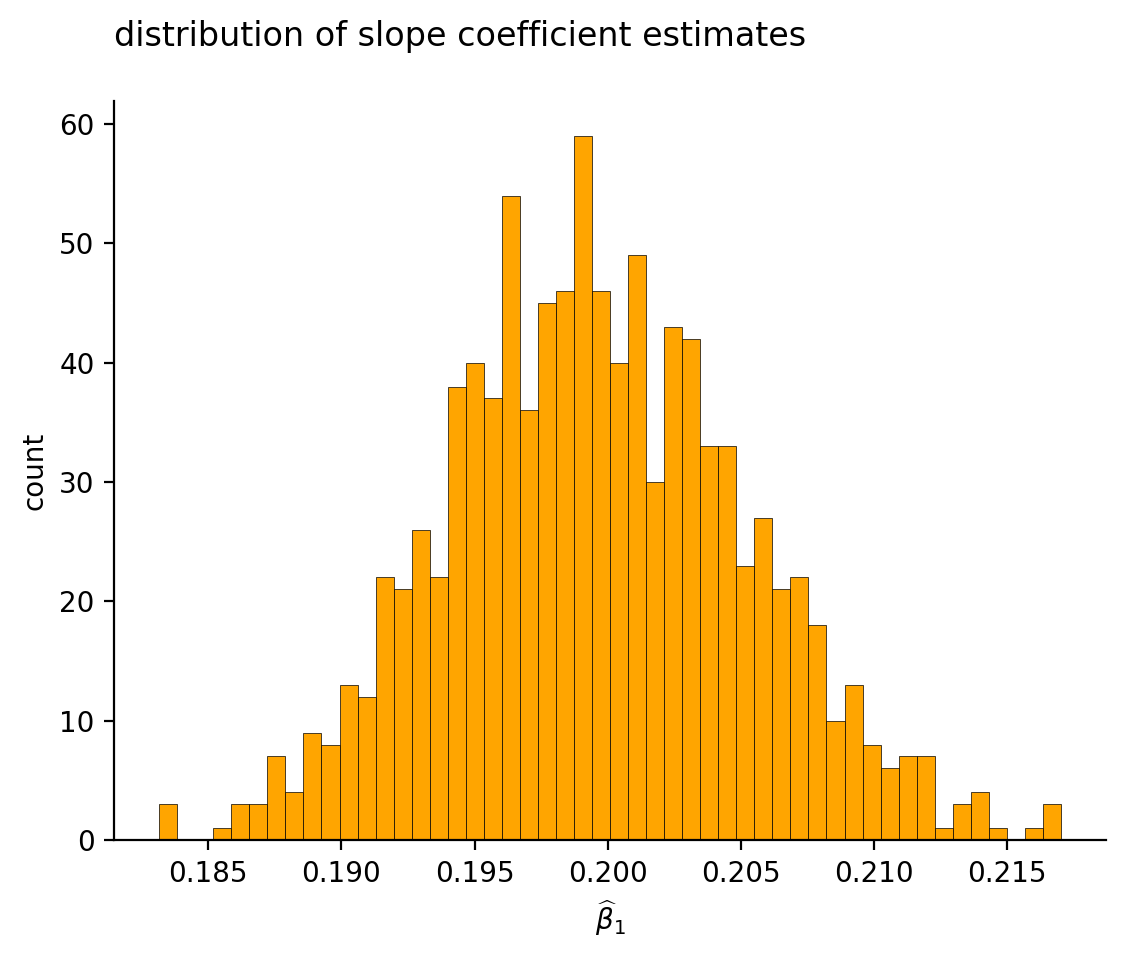

In [ ]:
# function to generate data
def synthetic_data(b0=7, b1=1/5, N=1000, x_min=0, x_max=100):
    # generate data
    x = np.random.uniform(x_min, x_max, N)
    # note that the second parameter is std dev in the normal distribution implementation in numpy
    e = np.random.normal(0, 5, N) 
    y = b0 + b1*x + e

    return (y, x)

# function to calculate slope coefficient
def beta1(y, x):
    x_bar = x.mean()
    y_bar = y.mean()

    cov_xy = sum((x - x_bar) * (y - y_bar))
    var_x  = sum((x - x_bar) ** 2)

    return cov_xy / var_x

# set the seed and generate the datasets
np.random.seed(0)
slopes = [beta1(*synthetic_data()) for _ in range(1000)]

plt.hist(slopes, bins = 50, color = "orange", edgecolor = "black", linewidth = 0.25)
plt.title("distribution of slope coefficient estimates\n", loc = "left")
plt.xlabel("$\\widehat{\\beta}_1$")
plt.ylabel("count")
plt.gca().spines[['right', 'top']].set_visible(False)

# the distribution of values follow a normal distribution around the "true" value